## 5 - Data Preprocessing

In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
from sklearn.datasets import load_wine, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [47]:
dataset = load_wine()

X = dataset["data"]
Y = dataset["target"]

In [48]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

Text(0.5, 1.0, 'Feature standard deviations')

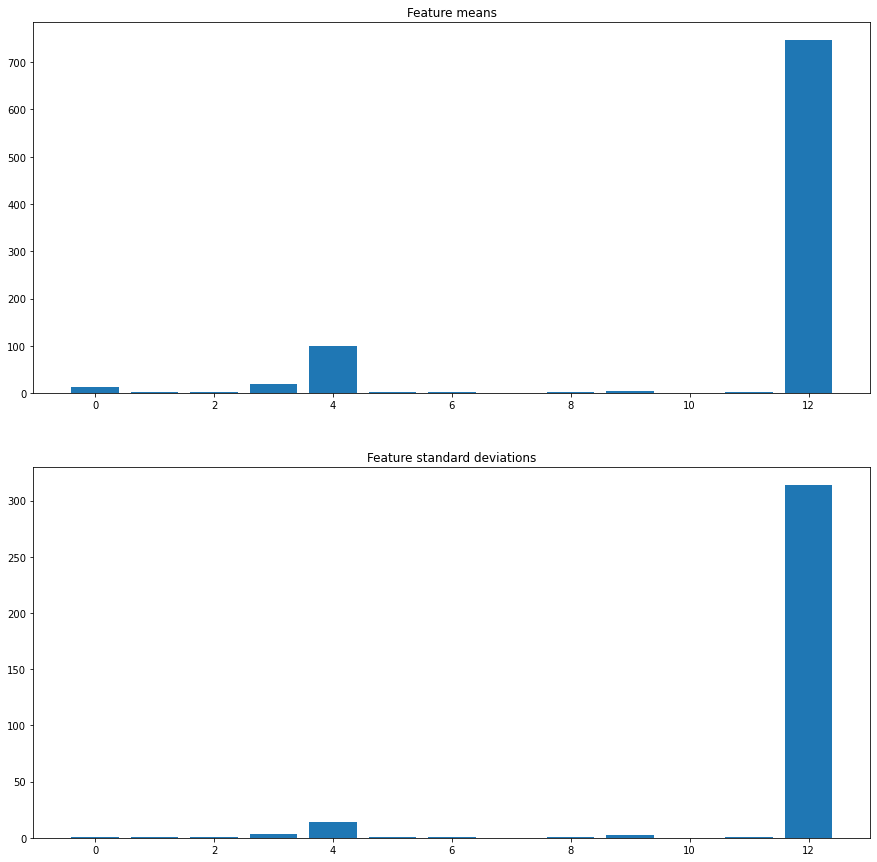

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

ax[0].bar([i for i in range(13)], height=X_mean)
ax[0].set_title("Feature means")

ax[1].bar([i for i in range(13)], height=X_std)
ax[1].set_title("Feature standard deviations")

### Let's train a Logistic Regression with the unscaled dataset

In [50]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=100)

In [53]:
lr = LogisticRegression(max_iter=10000, random_state=100)

In [54]:
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=100)

In [55]:
lr.score(X_test, Y_test)

0.9629629629629629

### Let's perform a standard scaling

In [56]:
ss = StandardScaler()

In [57]:
Xs = ss.fit_transform(X)

In [58]:
np.std(Xs, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
X_train, X_test,Y_train, Y_test = train_test_split(Xs, Y, train_size=0.7, random_state=100)

In [60]:
lr = LogisticRegression(random_state=100)

In [61]:
lr.fit(X_train, Y_train)

LogisticRegression(random_state=100)

In [62]:
lr.score(X_test, Y_test)

0.9814814814814815

### Let's perform a Min-Max scaling

In [63]:
mm = MinMaxScaler(feature_range=(-1, 1))

In [64]:
Xm = mm.fit_transform(X)

In [65]:
np.std(Xm, axis=0)

array([0.42607522, 0.44031764, 0.29259069, 0.34331647, 0.30961538,
       0.43040729, 0.42027382, 0.46831419, 0.36009391, 0.39449909,
       0.37061562, 0.51867638, 0.44796242])

In [74]:
X_train, X_test,Y_train, Y_test = train_test_split(Xm, Y, train_size=0.7, random_state=100)

In [75]:
lr = LogisticRegression(random_state=100)

In [76]:
lr.fit(X_train, Y_train)

LogisticRegression(random_state=100)

In [77]:
lr.score(X_test, Y_test)

1.0

### Let's perform a robust scaling

In [78]:
Xo, _ = make_blobs(n_samples=500, centers=1, random_state=100)

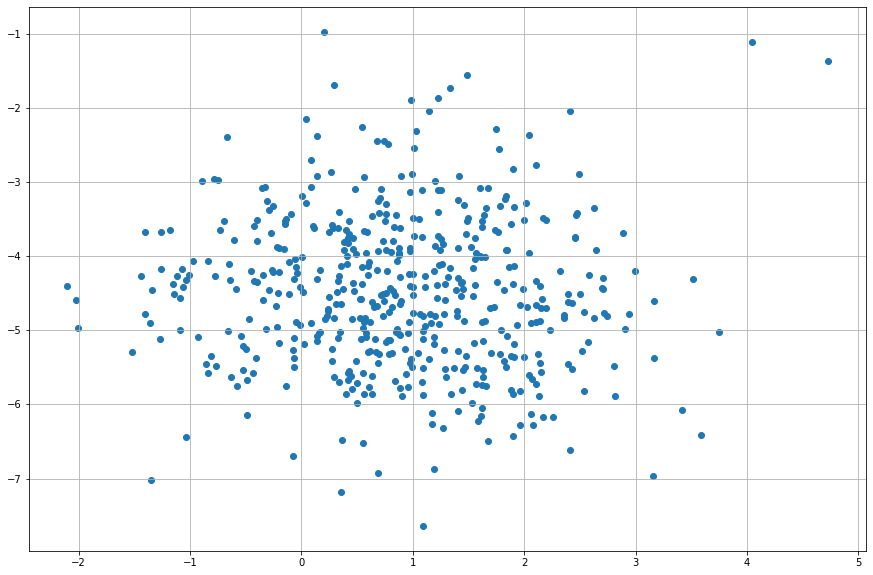

In [79]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(Xo[:, 0], Xo[:, 1])
ax.grid()

In [80]:
Xs = ss.fit_transform(Xo)

In [81]:
rs = RobustScaler(quantile_range=(5, 95))

In [82]:
Xr = rs.fit_transform(Xo)

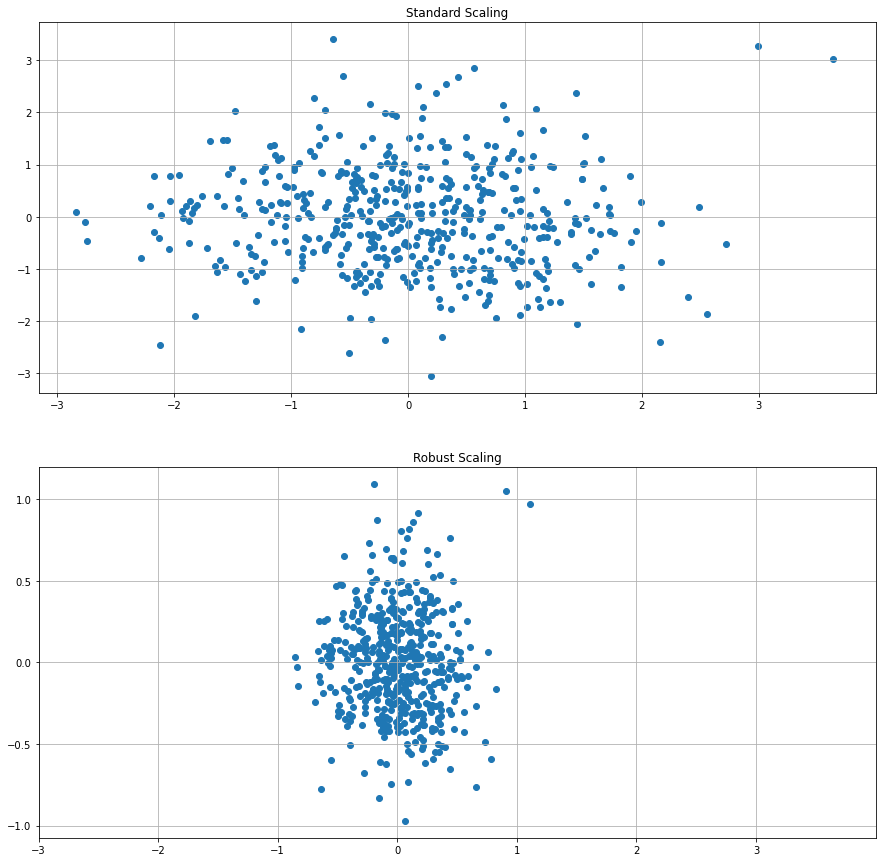

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

ax[0].scatter(Xs[:, 0], Xs[:, 1])
ax[0].set_xticks(range(-3, 5))
ax[0].set_xticks(range(-3, 4))
ax[0].set_title("Standard Scaling")
ax[0].grid()

ax[1].scatter(Xr[:, 0], Xr[:, 1])
ax[1].set_xticks(range(-3, 5))
ax[1].set_xticks(range(-3, 4))
ax[1].set_title("Robust Scaling")
ax[1].grid()

### Let's perform a whitening

In [89]:
def whitening(X):
    Xc = X - np.mean(X, axis=0)
    _, L, V = np.linalg.svd(Xc)
    W = np.dot(V.T, np.diag(1.0 / L))
    return np.dot(Xc, W) * np.sqrt(X.shape[0])

In [90]:
Xw = whitening(Xo)

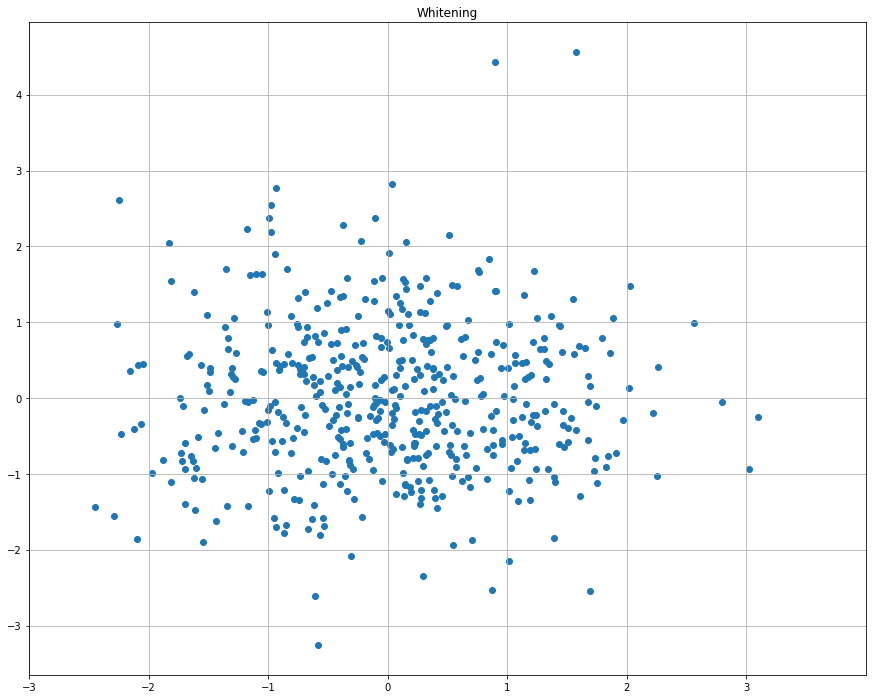

In [91]:
fig, ax = plt.subplots(figsize=(15, 12))

ax.scatter(Xw[:, 0], Xw[:, 1])
ax.set_xticks(range(-3, 5))
ax.set_xticks(range(-3, 4))
ax.set_title("Whitening")
ax.grid()

In [92]:
np.cov(Xw.T)

array([[ 1.00200401e+00, -6.22970835e-17],
       [-6.22970835e-17,  1.00200401e+00]])